<font size=7><b>Final Project Analysis

Congratulations, your experiment successfully ran on brain organoids! This notebook provides a brief summary of the protocol and data from the stimulation experiment your group created. Use this as a starting point for your own analysis, to be used in your final project [report/presentation](https://docs.google.com/document/d/1B0JPPlQ4dgkSrA47y6ITRCN_mMGhs9j-bRhvImF1cIA/edit?usp=sharing). 

<font color="red"><b>Note:</b>This is not necessarily a normal HW, it is supplementary to the final project which you may consider the "Final" for the class, however it is required to be completed to receive full marks for this project. Think of this as showing your work, here you can document all the code used to produce the figures and data used in your project. As such this  is due the same time as your Final Paper, **tuesday (June 11), at 11:59pm**. This is a group assignment so make sure to work together closely with a team of 4-5 people.

In [1]:
%run "final_analysis_source_code.ipynb"

Loading: final_analysis_source_code.ipynb...
Done at: 2024/06/04 14:34:42


<font color="red">**Note :** The datasets used for this notebook are too large (~130mb) to be stored on github, you can find and download the file here : </font>

* [DATA](https://drive.google.com/drive/folders/1tAEYVsyA1et041O7yaOIXxrtWdk6QNEp?usp=sharing)

Currently, the data set loaded in the `Data/recordings` folder is for group 1. If you are not part of group 1, follow the above link and replace the files in `Data/recordings` with your group's files. These files are denoted by the groups Chip Id, these are : 

- Group 1 : 22097
- Group 2 : 21985
- Group 3 : 22194
- Group 4 : 20264
- Group 5 : 22717

For grading please commit a version of the `Data` folder with just your groups data inside to the repository.

<font color="red">**Note :** I highly recommend you go through the source code notebook on top of this one, there is a lot of code there you can draw inspiration from on top of some extra code provided for you that can give you a head start in analysis.

# <font color="red"><u> **Important :</u>** </font>Final Project

Now that your experiments have run, it is up to you to analyze your results and attempt to understand what occurred. For the final, we ask you to prepare a short presentation that you will give to the rest of the class on the day of the final. In this presentation go over what occurs in the trial, what were your methods, and encodings/decodings/training signals? How did the organoid react to these, how did its structure and performance change over the course of the experiment? How do you think this structural change affects the performance? These are all good questions to tackle in this project.

This notebook, rather than being a homework, is an environment for you to go through your data and attempt analysis of it, it is essentially scratchwork. Most of your grade for this project are the report and presentation which you will find more information on here :

- [Final Project](https://docs.google.com/document/d/1B0JPPlQ4dgkSrA47y6ITRCN_mMGhs9j-bRhvImF1cIA/edit?usp=sharing)

However, like with most problems, we ask you to show your work for these projects, so this notebook will be where you submit that. I hope you enjoy working on it, from what I have gone through you have some quite interesting data! 


# Data

Like the datasets from previous homeworks, we are not giving you the raw data to analyze. We performed the process of spikesorting the raw data in order to determine where the neurons are in your recording. After spikesorting we removed any dubious neural units that either looked noisy or were "fake neurons''. The step or removing dubious neurons is called **curation**.

<font color="red"> You have been provided the experimental data from all 5 groups. You are welcome (but not obligated) to analyze other groups' datasets to see how they compare to your own. This may provide more insight into your experiment for the final paper/presentation.</font>


The experiment was structured in 5 phases : 

- before recording (5 mins)
- causal connectivity (5-10 mins)
- experiment (15 mins)
- after recording (5 mins)
- causal connectivity (5-10 mins)

We let the organoid sit and record it's base activity, then we collect the data used to construct the causal connectivity matrices, then we run the experiment where the organoid controls the mouse in the Food Land game, and final we let it sit again for 5 minutes recording activity and collect the data for the second Causal connectivity matrix. 

We give you the spikedata for the before and after recordings, but not during the experiment recording. This is because we are stimulating so frequently that you would mostly see just noise. 

Instead of the spike train for the experiment, we give you the logs of the food_land_game from this period. This should give you a better metric to assess how your organoid performed during the trial. Remember, we aren't looking for if your organoid did well or not, we care far more about if behavior changed at all during the runtime. 

We also give you the causal connectivity matrices before and after the recordings at both a first-order and multi-order scale. 

Outside of this we give you a lot of other data you can use in your own analysis. Here are the files you have access to :

- `exp1_mapping.csv` : The electrode mapping of your chip
- `exp1_food_land_game_log.csv` : The logs from the food Land runtimes, lets you see agent position and rewards per episode
- `exp1_food_land_train_log.csv` : The logs of the stim patterns over the course of the game's runtime
- `exp1_food_land_log.csv` : The logs of sensory info throughout the game's runtime

**before\after folders :**
This data is of the same format, but from information gathered from before or after the experiment respectively. 
- `info.npy` : general info about the experiment, a dictionary with the keys : {'split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths'}
- `burst_percent.npy` : The percent likelihood of a neuron to burst when being stimulated
- `first_order_connectivity.npy` : An $N\times N$ Causal Connectivity Matrix (range 10-15 ms)
- `multi_order_connectivity.npy` : An $N\times N$ Causal Connectivity Matrix (range 200 ms)
- `spikes.npy` : A $50\times N\times N$ matrix, first index is the reps we are looking at, next is what neuron is stimulating, third is how that neuron reacts to the first over the course of that rep. ie. spikes(1,4,6) would yeild the list of spike times from 6 for when you stimulate neuron 4 for the 1st rep play.

These files can be found in the `Data` folder, with your specific group's data being in the folder associated with your trial's MaxONE chip ID. These IDs are :
- Group 1 : 22097
- Group 2 : 21985
- Group 3 : 22194
- Group 4 : 20264
- Group 5 : 22717

For the most part you won't need to worry about these IDs since our `Selet_Group()` function loads your data based on your group number, but if you are writing functions specific to your own analysis it may be important to know. You can also access the spikesorted data used to create the sd objects for your group in `Data/recordings`, they are labeled by chip id and the before dataset ends in `exp1_acqm.zip` while the after ends with `exp1_1_acqm.zip`.

The objects generated by `Select_Group()` are also important to know, if only because it will make your time coding easier. These values are loaded globally so you can use them in this notebook without having to define them yourself. This data is all loaded from the above files : 

- `sd_pre / sd_post` : your loaded spikedata object before/after
- `spikes_pre / spikes_post` : data from spikes.npy
- `info` : data from info.npy
- `mapping` : data from exp1_mapping.csv
- `game_log / train_log / generic_log` : data from exp1_food_land_game_log.csv/exp1_food_land_train_log.csv/exp1_food_land_log.csv
- `before_first / after_first` : data from first_order_connectivity.npy before/after
- `before_multi / after_multi` : data from multi_order_connectivity.npy before/after

Run the cell below to select your group. This function will load your group's dataset into the notebook so that it can be used by you and the analysis functions/visualizations further down. 


In [47]:
interact_manual( Select_Group, group=groups)

interactive(children=(Dropdown(description='group', options=('Group 1', 'Group 2', 'Group 3', 'Group 4', 'Grou…

<function __main__.Select_Group(group)>

### Spike Rasters

Here are the spike rasters for before and after the stim, are there any pattern shifts we can see? Any bursts? 

Displaying Spike Rasters for Group Group 1


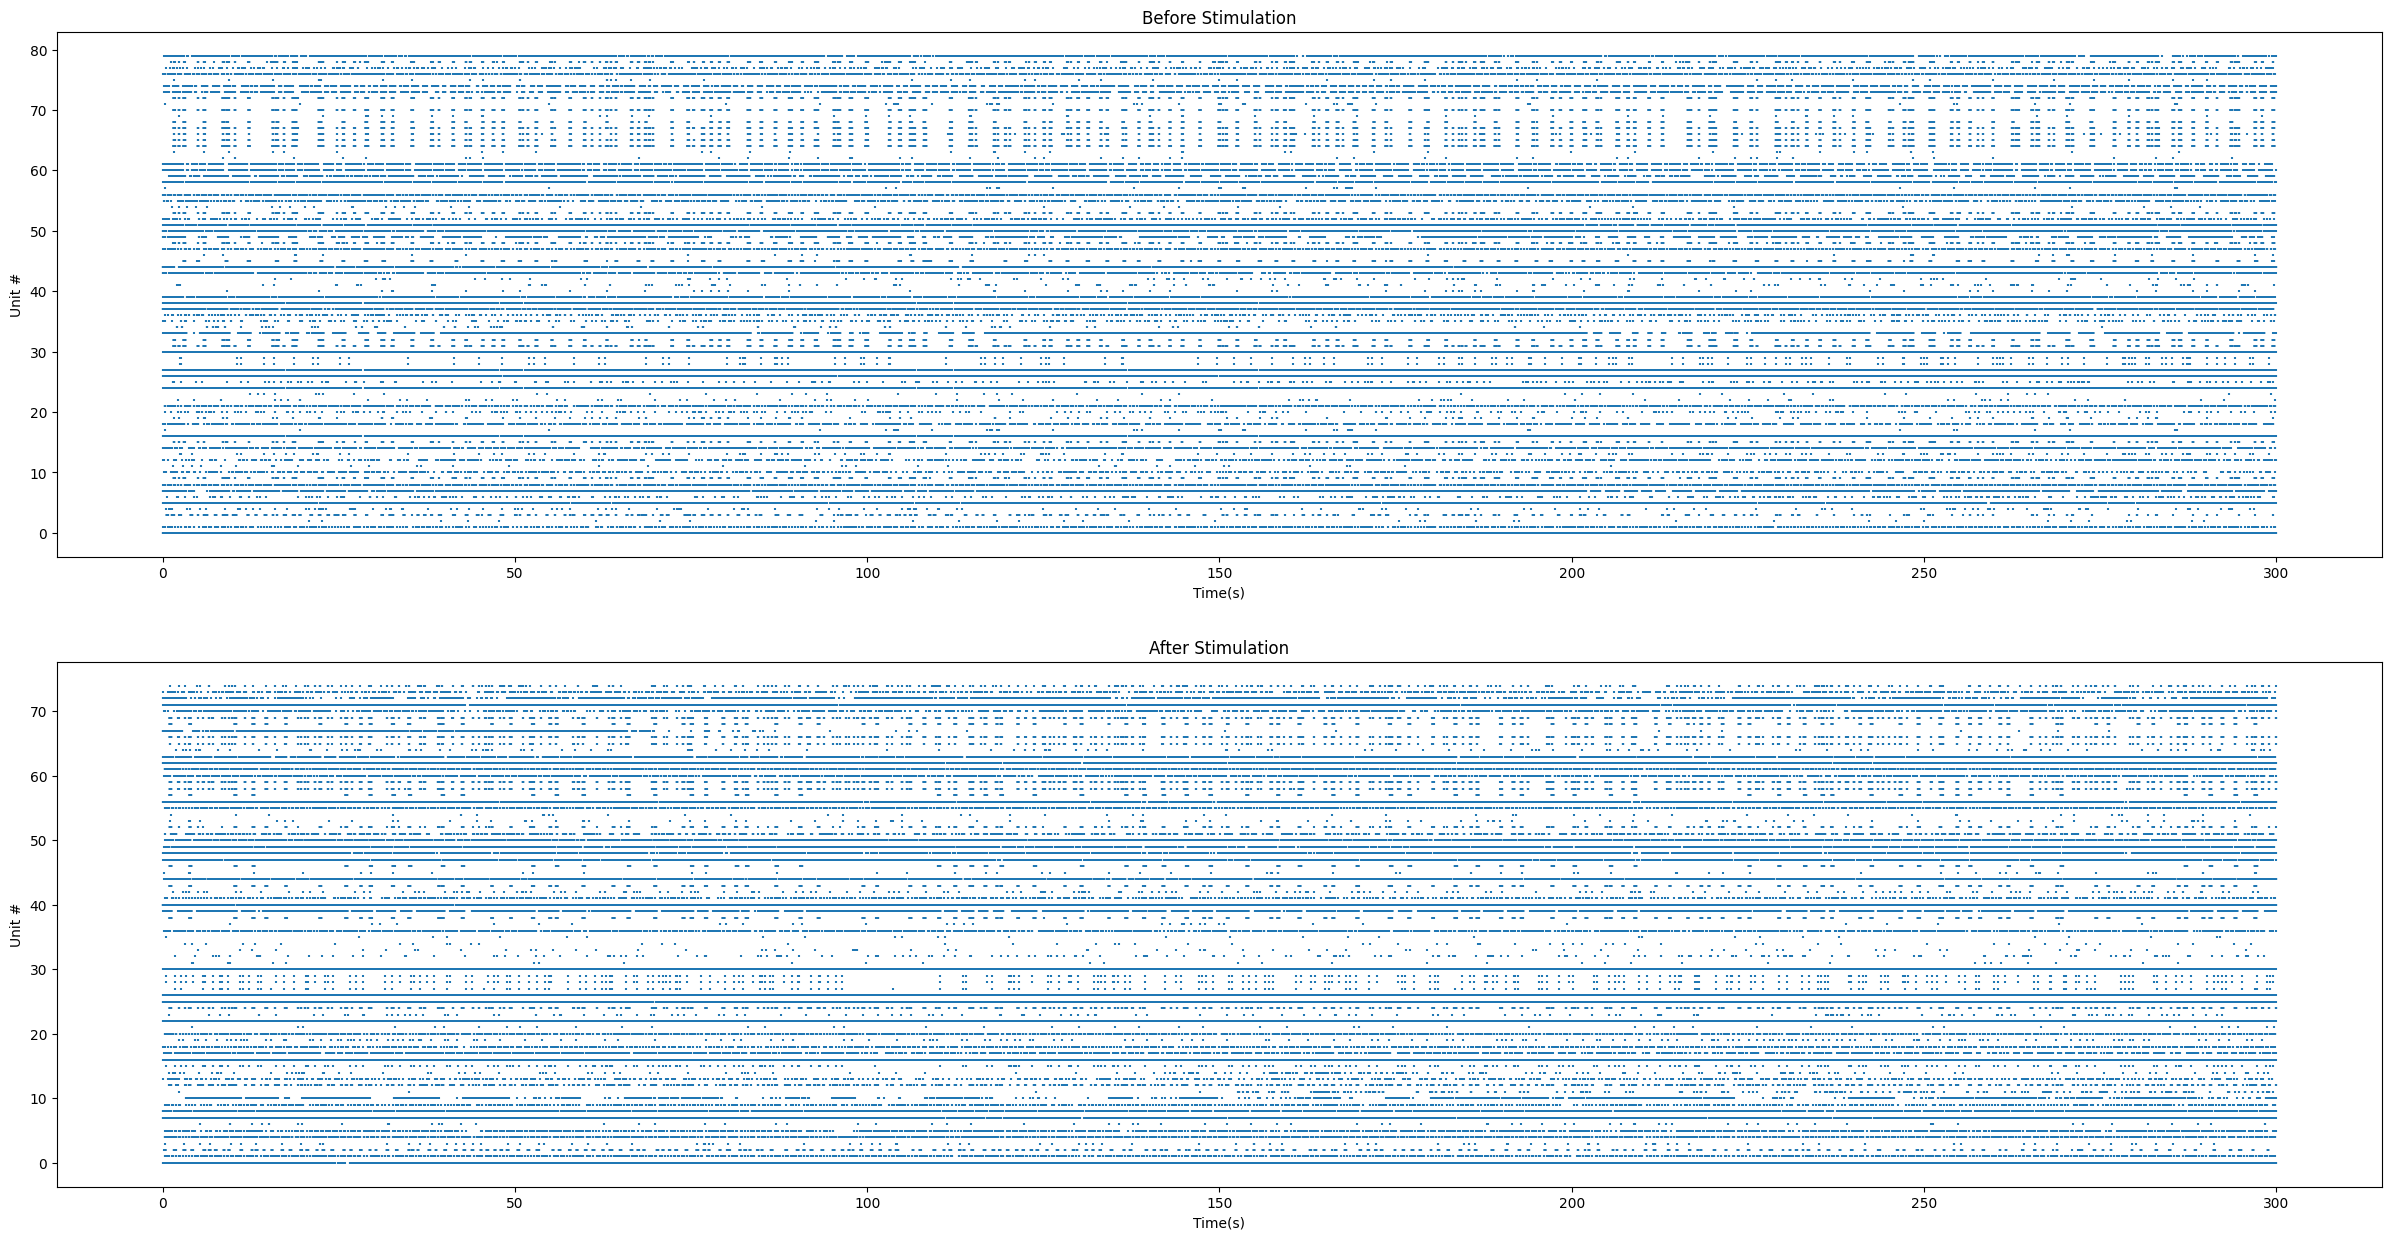

In [8]:
Plot_Rasters()

### Layout of Electrodes and Neurons 

Use the tool below to look at the neuron/electrode layout for your group's organoid. In other experiments, you would have access to the layout of both the before and after stimulation recordings. In this case, you would see the location and number of neurons change based on the file being plotted. This is because at these two timepoints, the spikesorting algorithm has used the different activity in the culture to derive different neural units. 

However in our case, the constraints of our experiment meant that we did not rely on spikesorting to choose our motor/sensor/training neurons. What we have here is the electrode layout (light blue) with the motor units in dark blue, sensory units in red, and the training in green. For our purposes, we will consider these "Neurons." 

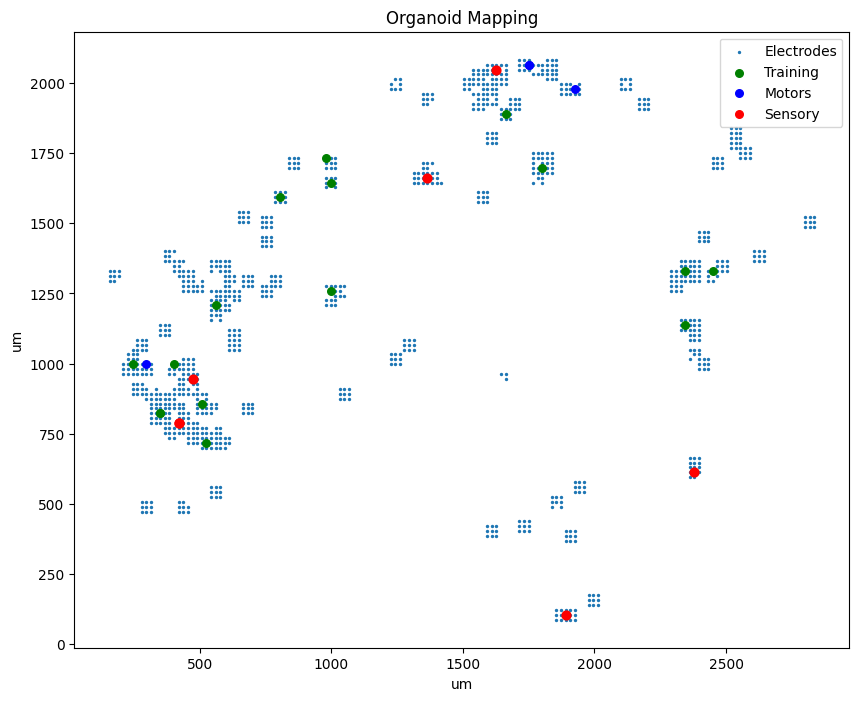

In [68]:
Get_Mapping(True)

### Causal Connectivity

Here are the Causal Connectivity matrices for your data set, the first column is from before stimulation and the second from after the experiment. Are these matrices different? Why do you think they changed? What do you see in the first/multi-order connections?

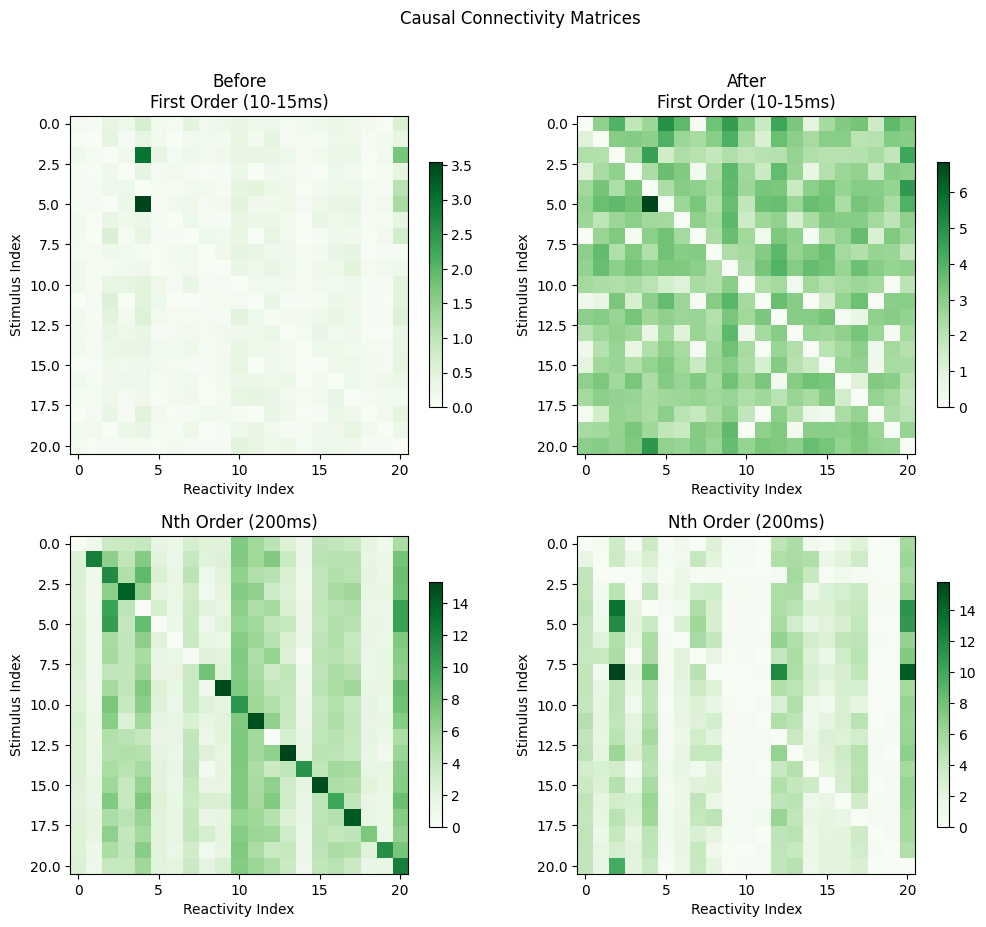

In [59]:
Plot_Causal()

### Spiking Interactions

Let's look a little more closely at `spikes.npy`, The tool below shows how a neuron reacts to another over the course of several stimulation reps. Use it to look through the reactivity, how does it compare to your Causal Connectivity matrix?

In [71]:
interact_manual( Inter_Reactions, set=["before", "after"])

interactive(children=(Dropdown(description='set', options=('before', 'after'), value='before'), Button(descrip…

<function __main__.Inter_Reactions(set)>

### Game Logs

Run the cell below to get the logs of your organoid's performance throughout the trials. Does this motion match what you had expected? What about the rewards acquired? Do we see any change in the behavior of the organoid over the course of the experiment or was performance consistent throughout? 

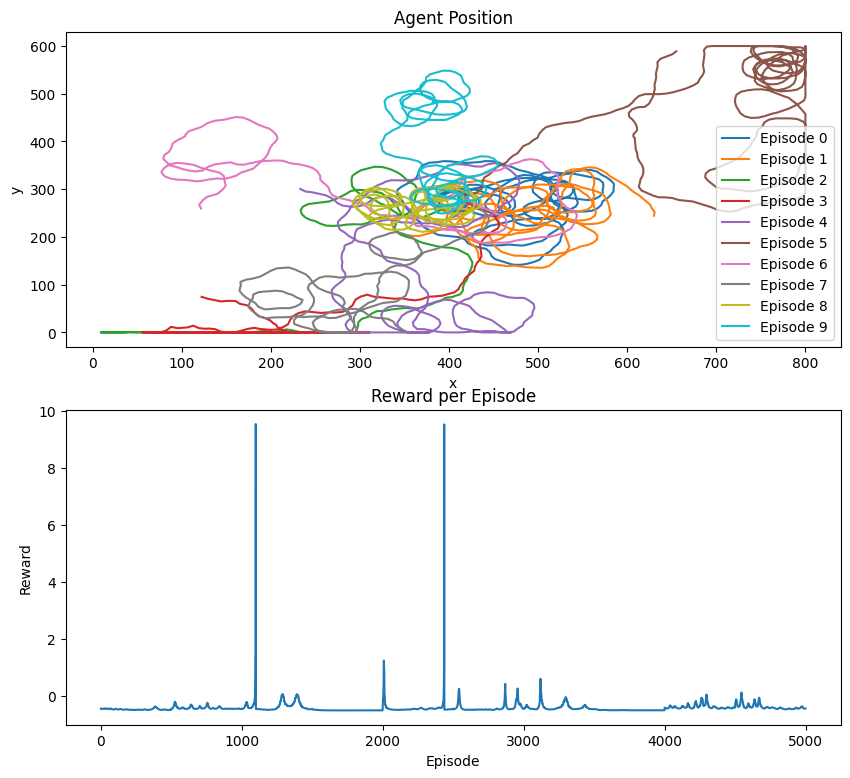

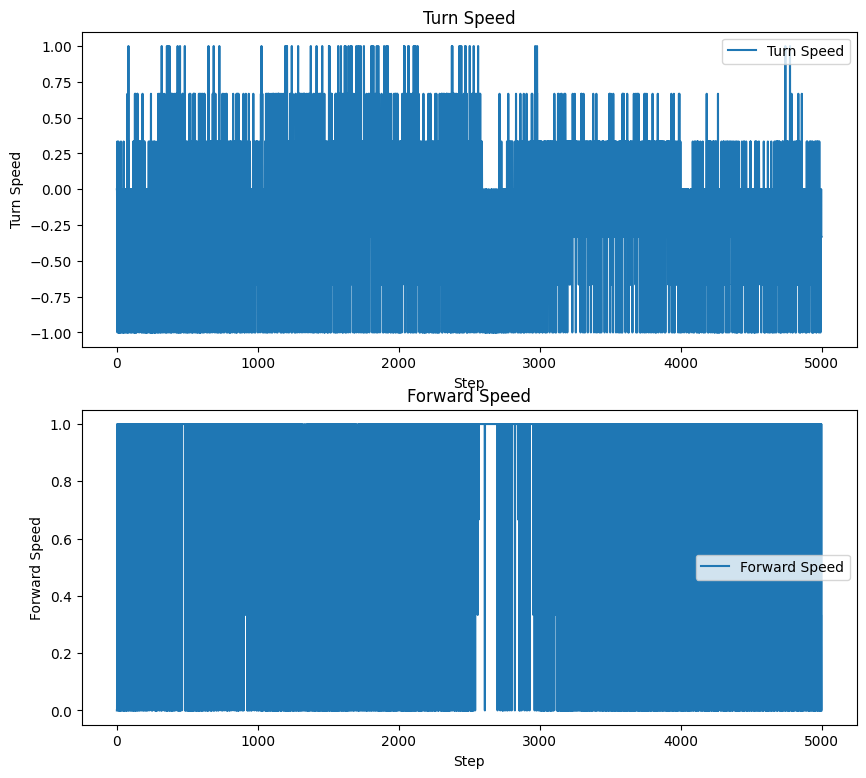

In [24]:
game_plots(game_log)
speed_plots(game_log)

# Questions to Consider

When doing your analysis, please remember to refer to the [final project summary](https://docs.google.com/document/d/1B0JPPlQ4dgkSrA47y6ITRCN_mMGhs9j-bRhvImF1cIA/edit?usp=sharing) we released. Below are some questions that may help guide the direction of your analysis.

* Nearly every proper biology experiment is set up to have a control sample that you compare your test sample to. In this case, what is your control? Is it the recording before stimulation? Is it the organoid that was never stimulated? (Hint: you can have multiple different controls) 
* Were you able to spot any bursts either before or after stimulation? Did the burst pattern change after stimulation?
* The rows of the spike raster (corresponding to neural units) are not lined up between the different recordings. Can you locate the raster for an individual neuron across different recordings? How does this individual neuron's behavior change pre vs post stimulation? The Neurons on the CC matrix however are kept the same throughout the process, are there any changes in behavior there? 
* In the game logs, is there any obvious change in behavior patterns in how the mouse moves/orients itself/collects rewards. Are there any events that occur in these logs that could point to behavior change? Does it seem that the train signal changes responses or does simply playing the game over time do we see a shift? 
* Did the organoid get better or worse at playing the game throughout the trial? Either result is significant, don't be shy to record poor performance. Remember it's not about how well your organoid performed, but if/how it changed over time. 
* Do you see new connections being made in the organoid before/after the trial is conducted? Do you see any old connections pruned? Do you see a completely new framework of reactivity in your organoid, if so why do you think that happend? 
* Are there clear chains of information flow across the organoid? If so, how do you think you could visualize that? Try to consider the various plots you might need to make for your paper/presentation. 
* Are there any papers, who conducted a similar experiment and got similar results? Did they get different ones? If they're different what could have caused the differences? 

# <font color="red">Your Analysis Code

<font color="red"> We expect you to keep a record of all the code you used for analysis inside of this repository, `Final_Project_Spring2024`. We recommend putting all your code below, however, you're allowed to break your code up into different notebooks/python files if you like. Please make sure your code is well documented and runs properly. It should contain numerous comments explaining what each piece does as well as instructions on how to run the code (if not obvious). **You will be graded on the cleanliness and runnability of the code** you submit for your final project. It's only necessary to record the code used to create figures/tables in your paper or presentation. Other exploratory code can be deleted, however, feel free to keep it if you're proud of it.